In [112]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [113]:
A = load_boston()
X = load_boston().data
Y = load_boston().target

In [114]:
A.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [115]:
print(A.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [116]:
data = pd.DataFrame(X)
#Assigning feature-names to colums of data frame
data.columns = A.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [117]:

#Adding the target column Price to the data frame
data['Price'] = Y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [119]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plotting on the boston housing data set

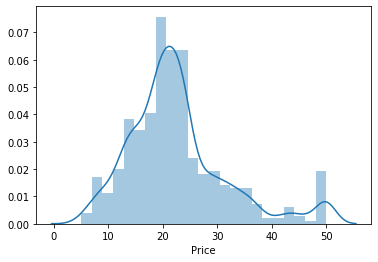

In [120]:
sns.distplot(data['Price'])

In [121]:
#Splitting whole data into train and test

from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=3)

# applying column standardization on train and test data

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['Price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.062687,-0.476211,1.024013,-0.281546,1.862698,-0.243926,0.472420,-0.611027,1.664762,1.520469,0.832501,0.367932,-0.000340,22.6
1,1.614536,-0.476211,1.024013,-0.281546,0.983540,-3.128541,1.143780,-1.262686,1.664762,1.520469,0.832501,0.435891,3.535521,13.8
2,-0.392880,-0.476211,-1.206774,-0.281546,-0.938540,2.251982,-1.121610,-0.142692,-0.869972,-0.782074,-0.181341,0.398712,-1.272131,43.8
3,-0.377619,0.431835,-0.609844,3.551814,-0.774775,2.063473,-0.586677,0.271119,-0.754757,-1.094984,0.095162,0.368263,-0.851462,35.2
4,-0.394475,-0.476211,-1.155441,-0.281546,-0.809252,0.079022,-1.828872,0.673913,-0.639542,0.127135,-0.688262,0.196603,-0.745246,22.6


In [132]:
#Custom function for SGD 

# Data Sampling reference : https://statinfer.com/104-3-1-data-sampling-in-python/


def Custom_SGD(data,stepsize,n_iterations,k):
    
    r = stepsize
    w , b = np.zeros(shape=(1,13)) , 0
    
    for i in range(0,n_iterations):
        
        d = data.sample(k)
        
        y=np.array(d['Price'])
        x=np.array(d.drop('Price',axis=1))
        
        w1 , b1 = np.zeros(shape=(1,13)), 0
        
        for j in range(k): 
            
            w1 = w1 + (-2)*x[j]*(y[j]-(np.dot(w,x[j])+b))
            b1 = b1 + (-2)*(y[j]-(np.dot(w,x[j])+b))
            
        w = (w - r * (w1/k))
        b = (b - r * (b1/k))
        
        #r=r/2  
        
    print(w)
    print(b)
    return w,b
    

In [123]:
w,b = Custom_SGD(df_train,1,100,20)

[[ 13.64189485   5.46896198  -4.50078501   2.84367127 -14.03093828
   18.51957488   9.77737059   4.93121118   4.09254251   1.68075172
   12.34277982 -16.23023763  -5.8219613 ]]
[17.32384135]


In [124]:
#prediction on x_test
# Reference for numpy as scalar : https://www.geeksforgeeks.org/numpy-asscalar-in-python/

y_pred=[]

for i in range(len(X_test)):
    
    val=np.dot(w,X_test[i])+b  #val= wTx+b
    
    y_pred.append(np.asscalar(val))

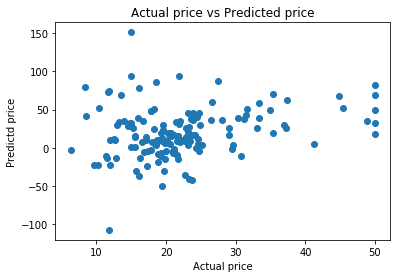

In [125]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [158]:
MSE_1=mean_squared_error(y_test,y_pred)
print('mean squared error =',MSE_1)

mean squared error = 976.1616968737734


### Trying with different parameter values in custom SGD 

#### Model 2

In [127]:
w2,b2 = Custom_SGD(df_train,1,400,25)

[[ 28.77978703  29.98667992  13.70710378  25.13581497  11.05078756
   61.3726718   22.91756199  -1.18272017   4.07524358  11.40748835
  -11.00286476  51.31245485 -19.22053076]]
[0.85227994]


In [129]:
#prediction on x_test
# Reference for numpy as scalar : https://www.geeksforgeeks.org/numpy-asscalar-in-python/

y_pred_2=[]

for i in range(len(X_test)):
    
    val=np.dot(w2,X_test[i])+b2  #val= wTx+b
    
    y_pred_2.append(np.asscalar(val))

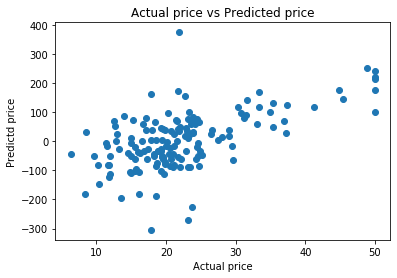

In [130]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_2)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [148]:
MSE_2=mean_squared_error(y_test,y_pred_2)
print('mean squared error =',MSE_2)

mean squared error = 9173.138607410328


#### Model 3

When R(stepsize/Learning rate) is constant we are able to see low error

In [133]:
w3,b3 = Custom_SGD(df_train,0.01,800,30)

[[-1.17675394e+00  9.03298492e-01 -5.78189077e-01  1.24875673e+00
  -1.21827941e+00  2.69109997e+00  7.47084791e-04 -2.36305980e+00
   1.70187392e+00 -6.85670219e-01 -1.95490543e+00  1.16832279e+00
  -3.69279217e+00]]
[22.74554409]


In [134]:
#prediction on x_test
# Reference for numpy as scalar : https://www.geeksforgeeks.org/numpy-asscalar-in-python/

y_pred_3=[]

for i in range(len(X_test)):
    
    val=np.dot(w3,X_test[i])+b3  #val= wTx+b
    
    y_pred_3.append(np.asscalar(val))

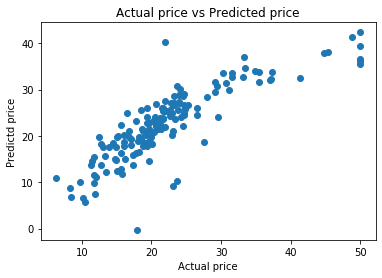

In [135]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_3)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [149]:
MSE_3=mean_squared_error(y_test,y_pred_3)
print('mean squared error =',MSE_3)

mean squared error = 23.185837117659656


In [140]:
#SGD regression sklearn implementation

LR =SGDRegressor(learning_rate='constant',penalty=None,max_iter=100)
LR.fit(X_train,y_train)
y_pred_sgd=LR.predict(X_test)

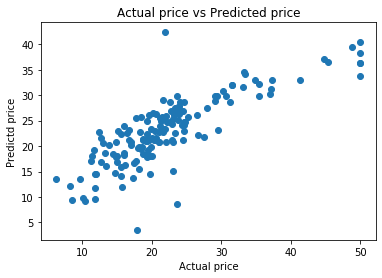

In [141]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [142]:
MSE_lr=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_lr)

mean squared error = 26.897098413583674


In [161]:
from prettytable import PrettyTable    

pt = PrettyTable()
pt.field_names=['Weight_custom_SGD ','Weight_sklearn_SGD']

weight_sgd=LR.coef_
for i in range(13):
    pt.add_row([w[0][i],weight_sgd[i]])
print(pt)

+---------------------+----------------------+
|  Weight_custom_SGD  |  Weight_sklearn_SGD  |
+---------------------+----------------------+
|  13.641894852414767 | -1.2907264860048555  |
|  5.468961980326554  |  1.0745731947801327  |
|  -4.500785013661613 | -0.20019601672410214 |
|  2.8436712737018475 |  1.2008571022301076  |
|  -14.03093828140941 | -1.3310653335268143  |
|  18.519574878008658 |  2.1864383617609713  |
|  9.777370590575368  | 0.31596517537045643  |
|  4.931211177611487  | -2.8380250422948268  |
|  4.092542508197102  |  3.021292909131984   |
|  1.680751723142019  |  -0.719226272778815  |
|  12.342779821634979 | -1.6899433204167493  |
| -16.230237630069563 |  1.0023769950687802  |
|  -5.821961297405411 |  -4.237564588141838  |
+---------------------+----------------------+


In [159]:
from prettytable import PrettyTable    

pt = PrettyTable()
pt.field_names=['SGD','MSE']
pt.add_row(['Custom 1',MSE_1])
pt.add_row(['Custom 2',MSE_2])
pt.add_row(['Custom 3 with constant R',MSE_3])
pt.add_row(['Standard SKlearn SGD',MSE_lr])
print(pt)

+--------------------------+--------------------+
|           SGD            |        MSE         |
+--------------------------+--------------------+
|         Custom 1         | 976.1616968737734  |
|         Custom 2         | 9173.138607410328  |
| Custom 3 with constant R | 23.185837117659656 |
|   Standard SKlearn SGD   | 26.897098413583674 |
+--------------------------+--------------------+


### Observations:

1. We Initially split the data and standardized the values in order to bring the values under same scale
2. Implemented a Custom SGD function for Linear Regression
3. Considering the necessary parameters build mutilple models to attain best MSE value 
4. Changing the Iterations and batch size, we can observe a huge change in the MSE value
5. With constant R(stepsize/learning rate) and other parameters, we acquired a good MSE when compared to the actual standard SKlearn SGD 